In [6]:
import pyexcel as p
import openpyxl as xl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
in_file="/home/xuefei/CSCI5502-DataMining_Project/Dataset/employment/Contributing_family _workers_female.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]

In [8]:
in_file1="/home/xuefei/CSCI5502-DataMining_Project/Dataset/employment/real_data.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

In [9]:
out_file = "/home/xuefei/CSCI5502-DataMining_Project/Dataset/employment/Contributing_family _workers_male.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

In [60]:
for process_line in range(2,189):
    country_name=oldws.cell(row = process_line, column = 1).value
    for row_index in range(2,265):
        if oldws1.cell(row= row_index, column = 1).value==country_name:
            for cols in range(3,33):
                newws.cell(row = process_line, column = cols).value= oldws1.cell(row =row_index, column = cols).value
newwb.save(str(out_file))

In [61]:
df_family_female = pd.read_excel("/home/xuefei/CSCI5502-DataMining_Project/Dataset/employment/Contributing_family _workers_female.xlsx")
df_family_male = pd.read_excel("/home/xuefei/CSCI5502-DataMining_Project/Dataset/employment/Contributing_family _workers_male.xlsx")

In [62]:
female_column = df_family_female.mean(axis=0)
male_column = df_family_male.mean(axis=0)

In [63]:
female_years=[]
for i in range(1991,2021):
    year=str(i)
    female_years.append((female_column[year]))
    
y1=np.array(female_years)

In [71]:
print(y1)

[20.60560436 20.53791451 20.36095727 20.14577542 19.93376472 19.73504282
 19.55945468 19.39081812 19.23654552 18.96939038 18.74591979 18.44335298
 18.30235296 18.0111604  17.74708545 17.48662565 17.15038506 16.87934759
 16.61722988 16.38174327 16.08086091 15.83445994 15.57943315 15.33140107
 15.01175397 14.59557224 14.23005347 14.03750272 13.85043312 13.67147057]


In [64]:
male_years=[]
for i in range(1991,2021):
    year=str(i)
    male_years.append((male_column[year]))
    
y2=np.array(male_years)

In [72]:
print(y2)

[34.55095197 34.5065828  34.33325122 34.19830487 33.83964179 33.51063649
 33.20619793 32.91550274 32.76837439 32.44289836 32.10062571 31.78636904
 31.33372731 30.75327258 30.30119251 29.73122461 29.15211224 28.73325666
 28.47547051 28.0373209  27.6862567  27.26780219 26.86588767 26.39204286
 25.99598933 25.66510172 25.33325128 24.97415506 24.69110162 24.40462032]


In [73]:
all_gender_years=[]
for i in range(1991,2021):
    year=str(i)
    ratio=male_column[year]/female_column[year]
    all_gender_years.append(ratio)
y=np.array(all_gender_years)

In [74]:
print(y)

[1.6767745  1.68014054 1.68622972 1.69754225 1.69760415 1.69802705
 1.69770571 1.6974788  1.70344381 1.71027628 1.71240601 1.72345934
 1.71200541 1.70745648 1.70738979 1.70022652 1.69979345 1.70227294
 1.71361116 1.711498   1.72168996 1.72205445 1.72444577 1.72143712
 1.73170899 1.75841696 1.78026396 1.77910242 1.78269527 1.78507646]


In [65]:
years=[]
for i in range(1991,2021):
    years.append(i)
x=np.array(years)

In [79]:
m1, b1 = np.polyfit(x, y1, 1)
print(m1,b1)
m2, b2 = np.polyfit(x, y2, 1)
print(m2,b2)
m, b = np.polyfit(x, y, 1)
print(m, b)

-0.250658790129523 520.1116506708184
-0.3826732097809258 797.3162263285371
0.002907826552833701 -4.113571709275083


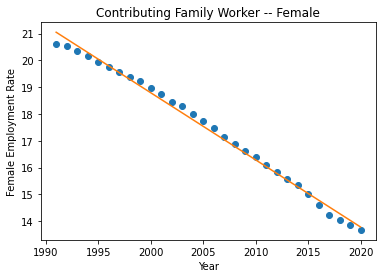

In [80]:
plt.title("Contributing Family Worker -- Female")
plt.xlabel('Year')
plt.ylabel('Female Employment Rate')
#female_column.plot()
plt.plot(x, y1, 'o')
plt.plot(x, m1*x + b1)

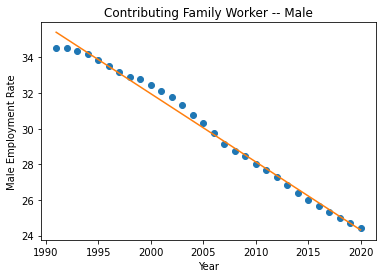

In [81]:
plt.title("Contributing Family Worker -- Male")
plt.xlabel('Year')
plt.ylabel('Male Employment Rate')
#male_column.plot()
plt.plot(x, y2, 'o')
plt.plot(x, m2*x + b2)

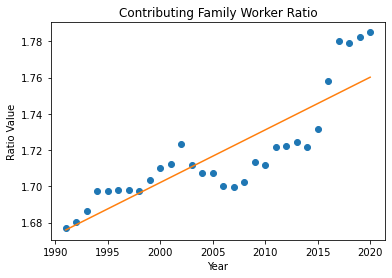

In [82]:
plt.title("Contributing Family Worker Ratio")
plt.xlabel('Year')
plt.ylabel('Ratio Value')
#female_column.plot()
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)